# Bi-dimensional discrete convolution
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [2D_discrete_convolution.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Fundamentals/2D_discrete_convolution.ipynb)
---
Naive implementetation of bi-dimensional discrete convolution.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import imageio

from numba import jit, prange

from _utils import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
M, N = 7, 7
x = np.zeros((M, N))
x[M//2, N//2] = 1
h = np.arange(9).reshape(3, 3) + 1

$$ \large \displaystyle
(h*x)[n_1, n_2]=\sum_{k_1=-\infty}^{\infty}\sum_{k_2=-\infty}^{\infty}h(k_1, k_2)x(n_1-k_1,n_2-k_2)
$$

In [4]:
@jit(nopython=True, parallel=True)
def convolve(x, h):
    xh, xw = x.shape
    hh, hw = h.shape
    # Kernel radius
    rh, rw = np.array(h.shape)//2
    # Init output
    output = np.zeros(x.shape)
    for n1 in prange(rh, xh-rh):
        for n2 in prange(rw, xw-rw):
            value = 0
            for k1 in prange(hh):
                for k2 in prange(hw):
                    value += h[k1, k2]*x[n1 + k1 - rh, n2 + k2 - rw]
            output[n1, n2] = value
    return output

print(x, end=' input\n\n')
print(h, end=' kernel\n\n')
print(convolve(x, h), end=' convolution\n\n')

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]] input

[[1 2 3]
 [4 5 6]
 [7 8 9]] kernel

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 9. 8. 7. 0. 0.]
 [0. 0. 6. 5. 4. 0. 0.]
 [0. 0. 3. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]] convolution



## Spatial filtering
---
Spatial filtering by the application of *discrete convolution* on images.

In [5]:
img_in = imageio.imread('../_data/pimentos.png')/255
img_in = np.median(img_in, axis=2)

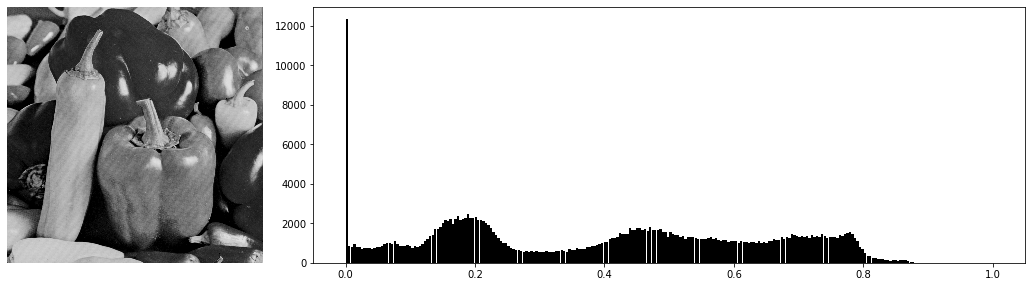

In [6]:
histogram(img_in, interval=[0, 1])

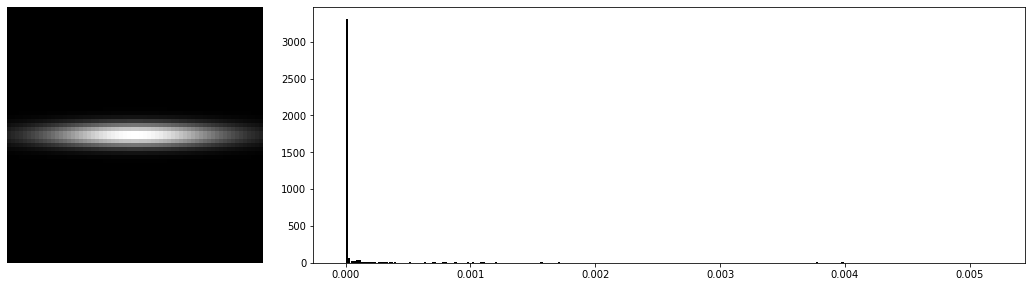

In [7]:
# Kernel definition
size = 64j
u, v = np.mgrid[-1:1:size, -1:1:size]
radial = (64*u**2 + v**2)**0.5
kernel = np.exp(-2*radial**2)
kernel /= kernel.sum()
histogram(kernel, interval=[0, kernel.max()])

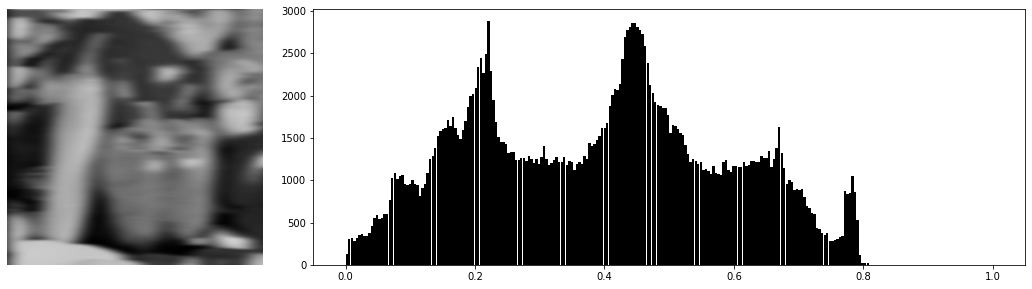

Wall time: 2.34 s


In [8]:
%%time
r = int(size.imag)
# Padding zero
img_pad = np.pad(
    img_in,
    ((r, r), (r, r)),
    'edge'
)
# Convolution
conv2d = convolve(img_pad, kernel)[r:-r, r:-r]
histogram(conv2d,interval=[0, 1])